# Are Amazon Fires Really Increasing?
#### _An Exploratory Data Analysis of Amazon Fires in Brazil_

### Introduction

The dataset was obtained on [INPE](http://www.inpe.br/dados_abertos/) (acessed on December 4th 2019), aggregated using Postgres SQL and can be found in [kaggle](https://www.kaggle.com/mbogernetto/fires-in-the-brazilian-amazon-1999-to-2019-inpe).

The description is as follows:
<br>
_"This dataset refers to fire outbreaks in the Amazon rainforest in Brazilian territory. The data used are public and were downloaded from the INPE website, where each line is a "fire spot" or a "fire outbreak"_

It is important to note that there are many other forest biomes in Brazil in the same kind of danger, and also that Amazon is not only above Brazilian territory, as it was previously said. 

Feedback is extremly welcome. I hope you enjoy this work and can get some useful insight or piece of code from it.

### Context

The Amazon rainforest is a moist broadleaf tropical rainforest in the Amazon biome that covers territory belonging to nine nations. The majority of the forest is contained within Brazil, with 60% of the rainforest, followed by Peru with 13%, Colombia with 10%, and with minor amounts in Venezuela, Ecuador, Bolivia, Guyana, Suriname and French Guiana. The total area is 5,500,000 square kilometres (2,123,562 square miles).

Specifically in Brazil, the Amazon forest covers the territory of 9 of its states. They are: Acre, Amapa, Amazonas, Maranhao, Mato Grosso, Para, Rondonia, Roraima and Tocantins. The map below shows where each state is located in the country. TABLEAU was used to build this map.

![](https://cdn-cf.tucantravel.com/images/Experiences/WILDLIFE_HOLIDAY_TOURS/AMAZON-JUNGLE-MAP-IN-SOUTH-AMERICA.jpg)

**FRED**: Colocar legenda nesse gráfico tipo verde: estados que tem MATO. Eu acho que isso aqui tinha que ser uma figura. Deixa o notebook mais lento e pdoer mexer no mapa não agrega em nada

In [2]:
%%HTML
<div class='tableauPlaceholder' id='viz1576060548855' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;br&#47;brazil-map&#47;BrazilMap&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='views&#47;brazil-map&#47;BrazilMap?:embed=y&amp;:display_count=y&amp;publish=yes' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;br&#47;brazil-map&#47;BrazilMap&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1576060548855');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

**FRED**: BOTAR FONTE DE ONDE TIROU

The lush region provides important benefits to communities living near and far. Nearly 500 indigenous communities call the Amazon rainforest home. It’s a highly biodiverse ecosystem, home to untold species of plants and animals. The rainforest can create its own weather and influence climates around the world. Unfortunately, the fragile ecosystem faces the constant threat of deforestation and fires (for natural or anthropogenic causes).

![](https://www.dw.com/image/50112402_303.jpg)

### Objectives

The importance of the Amazon rainforest for the balance of the world environment is unquestionable. This kernel will analyze the amount of fire outbreaks in the 9 Brazil states where Amazon biome can be found, from 1999 to 2019.

This kernel can not make conclusions on the reasons why the Amazon fires are happenning, as the data is only about the amount of fire outbreaks. So, the question we want to answer with this analysis is: **Are Amazon fires increasing?**

---
---

# 1 - The dataset

## 1.1 - Introducing the Data

### General information

- Original format: CSV
- Original dataset shape: 
    - 21 files (one per year)
    - 12961264 rows (total)
    - 12 columns: 
        - datahora =datetime
        - satelite = satellite
        - pais = country
        - municipio = city
        - bioma = biome
        - diasemchuva = days without rain
        - precipitacao = rainfall
        - riscofogo = risk of fire
        - latitude = latitude
        - longitude = longitude
        - frp = fire radiative power
- Aggregated dataset shape: 
    - 2196 rows
    - 6 columns
    
### Features in the dataset

The original dataset was aggregated using SQL, and the final dataset has the following features:

- **year**: Year of occurrence
- **month**: Month of occurrence
- **state**: State of occurrence
- **latitude**: Average latitude of all occurrences in this month, year and state
- **longitude**: Average longitude of all occurrences in this month, year and state
- **firespots**: Number of forest fire outbreaks

---

## 1.2 - Data preparation using SQL

Since the original data had too many rows, the first thing I decided to do was to process them using PostgresSQL and select only the data I wanted.

I aggregated the fire outbreaks by year, month and state, counting the number of occurrences and taking to average of latitude and longitude.

The code used in SQL was as follows:

```SQL
SELECT 
    EXTRACT(YEAR FROM datahora) as year,
    EXTRACT(MONTH FROM datahora) as month,
    estado as state,
    AVG(latitude) as latitude,
    AVG(longitude) as longitude,
    COUNT(estado)  as firespots
    
FROM south_america_fires 

GROUP BY 
    EXTRACT(YEAR FROM datahora), 
    EXTRACT(MONTH FROM datahora), 
    estado

ORDER BY year;
```

**FRED**: ACHO QUE ESSA VERSÃO DE CIMA MAIS COMPACTA FICA MELHOR, NÃO ACHO QUE PRECISA OS UNION

```SQL
SELECT EXTRACT(YEAR FROM datahora) as year, EXTRACT(MONTH FROM datahora) as month, estado as state, AVG(latitude) as              latitude, AVG(longitude) as longitude, COUNT(estado)  as firespots
FROM south_america_fires_1999_2009 
GROUP BY EXTRACT(YEAR FROM datahora), EXTRACT(MONTH FROM datahora), estado

UNION ALL

SELECT EXTRACT(YEAR FROM datahora) as year, EXTRACT(MONTH FROM datahora) as month, estado as state, AVG(latitude) as              latitude, AVG(longitude) as longitude, COUNT(estado) as firespots
FROM south_america_fires_2010_2016 
GROUP BY EXTRACT(YEAR FROM datahora), EXTRACT(MONTH FROM datahora), estado

UNION ALL

SELECT EXTRACT(YEAR FROM datahora) as year, EXTRACT(MONTH FROM datahora) as month, estado as state, AVG(latitude) as              latitude, AVG(longitude) as longitude, COUNT(estado) as firespots
FROM south_america_fires_2017_2019 
GROUP BY EXTRACT(YEAR FROM datahora), EXTRACT(MONTH FROM datahora), estado

ORDER BY year;
```

---

## 1.3 - Importing Libraries and Reading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Different encoding due to brazilian data
amazonfires = pd.read_csv("inpe_amazon_fires_1999_2019.csv", encoding='LATIN1')

In [3]:
amazonfires.head()

,year,month,state,latitude,longitude,firespots
0,1999,1,AMAZONAS,-2.371113,-59.899933,3
1,1999,1,MARANHAO,-2.257395,-45.487831,36
2,1999,1,MATO GROSSO,-12.611337,-55.076516,19
3,1999,1,PARA,-2.474820,-48.546967,87
4,1999,1,RONDONIA,-12.861700,-60.513100,1


In [4]:
# Transforming the column year from integer to date
amazonfires['year'] = pd.to_datetime(amazonfires['year'], format="%Y") 

# Generating years for the graph axis labels
int_year = list(range(1999, 2020))
years = pd.to_datetime(int_year, format='%Y')

# Sorting states by number of fire outbreaks, for the graphs
legal_amazon = (
    amazonfires[['state','firespots']].groupby('state',as_index=False)
    .sum().sort_values('firespots',ascending=False)['state'].values
)

# Month names in full length
fullmonth = ['January', 'February', 'March', 'April', 'May', 'June',
             'July', 'August', 'September', 'October', 'November', 'December']

---

---

# 2 - Analysis

## 2.1 Overview

First, I want to analyse the situation in an overview, detecting the fire outbreaks year, month and state.

### Year

The graph below shows the **sum** of fire outbreaks in Amazon detected by INPE for each year since 1999. 

It seems that, overall, the number of fire outbreaks in the Amazon is increasing, especially since 2012, having its record in 2019 (it is important to remember that the data from 2019 is not complete, since it was extracted at December 4th 2019).

## FRED: VER EL NINO LA NINA

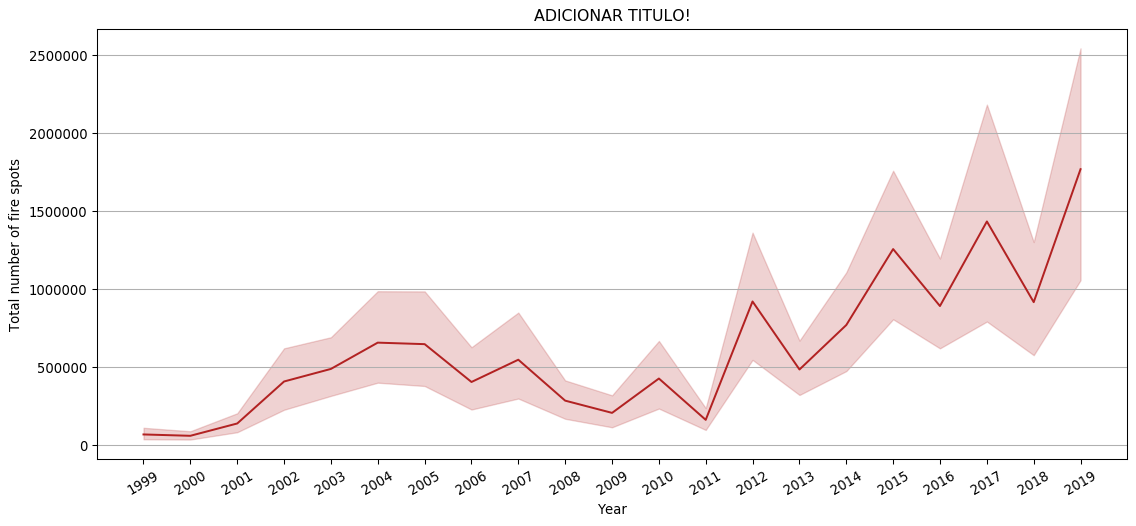

In [11]:
plt.figure(figsize=(14,6), dpi=95)
chart = sns.lineplot(data=amazonfires, x='year', y='firespots', estimator='sum', color="firebrick")
plt.ylabel("Total number of fire spots")
plt.xlabel("Year")
plt.xticks(years, int_year, rotation=30)
plt.title("ADICIONAR TITULO!")
plt.grid(axis='y')

### FRED 

parece bem claro que tá aumentando olhando só por esse gráfico, mas a dúvida que fica é: tá aumentando ou eles tão medindo mais e agora tem mais valores?

Outra coisa que eu fiquei em dúvida, não tá contando dados duplos de diferentes satélites? Lembro que tinham vários no site

### Month

The graph below shows the **average** of fire outbreaks in Amazon detected by INPE for each month in the range of 1999 to 2019. The confidence band is of 95%.

The graph shows that the second semester of the year, in average is the most affected by fire outbreaks, the top 3 being September, August and October. However, with the confidence interval of 95%, the graph shows the data variation is very large. **fred: o que é very large? só é large em agosto e setembro e aí tem cahnce de agosto ser maior q setembro pela alta dispersão. o resto parece ok** 

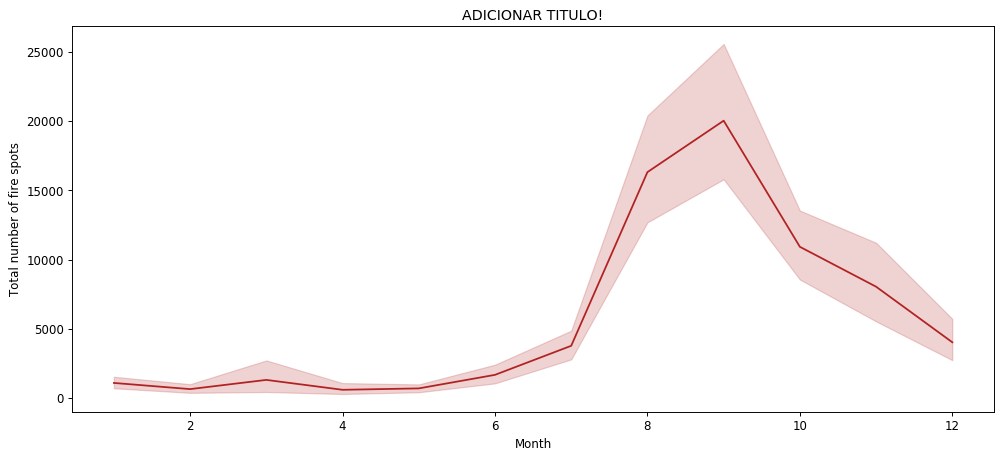

In [13]:
plt.figure(figsize=(14,6), dpi=85)

sns.lineplot(data=amazonfires, x='month', y='firespots', color="firebrick")    

plt.ylabel("Total number of fire spots")
plt.title("ADICIONAR TITULO!")
plt.xlabel("Month");

### State

It is also important to know which states are the most affected by the fires. The figure below shows the **sum** of fire outbreaks for each state for all the years in the dataset. **Para** and **Mato Grosso** are the most affected states in Brazil by the Amazon fires, **having at least twice the amount of fire outbreaks of others combined.**

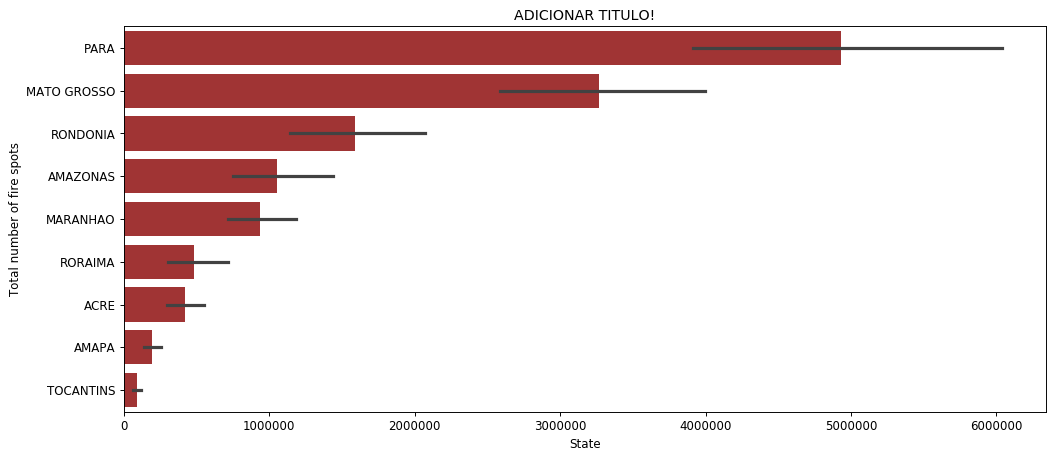

In [15]:
plt.figure(figsize=(14,6), dpi=85)

sns.barplot(data=amazonfires, x='firespots', y='state', estimator=sum, color='firebrick', order=legal_amazon)    

plt.ylabel("Total number of fire spots")
plt.title("ADICIONAR TITULO!")
plt.xlabel("State");

---

## 2.2 - Diving deeper - Combining Features

Having a broader sense of the problem, the current situation, and the most critical states and periods of the year, it's time to dig deeper into the data.

### State and Year

Let's analyse these two features together. How is the behavior of each state over the years?
The graph below shows the **sum** of fire outbreaks for each state, with a confidence band of 95%.

### FRED 

Acho que dá pra deixar só o outro gráfico. esse aqui não dá pra ver nada.

In [10]:
"""plt.figure(figsize=(14,8), dpi=85)

sns.lineplot(data=amazonfires, hue='state',
            x='year', y='firespots', estimator='sum')

plt.ylabel("Total number of fire spots")
plt.xlabel("Year")
plt.xticks(years)
plt.legend();"""

'plt.figure(figsize=(14,8), dpi=85)\n\nsns.lineplot(data=amazonfires, hue=\'state\',\n            x=\'year\', y=\'firespots\', estimator=\'sum\')\n\nplt.ylabel("Total number of fire spots")\nplt.xlabel("Year")\nplt.xticks(years)\nplt.legend();'

It seems that, in the last decade, Para and Mato Grosso were already the most affected states by the Amazon fires, having similar amounts of fire outbreaks. 
However, since 2012, Para took off in the number of outbreaks, and is perhaps the largest contributor to the increase in the total number seen earlier.

2012 was a critical year for Amazon fires. It represents an important milestone in the amount of fire outbreaks for 5 states (Para, Mato Grosso, Rondonia, Amazonas and Maranhao), from which the fires only got worst. The data suggests that these 5 states had their fire outbreaks record in 2019.

Amapa and Tocantins have very little amounts of fire outbreaks, and do not seem to vary over the years. The thin confidence intervals in these states showing that even over the months, there is no much variation.

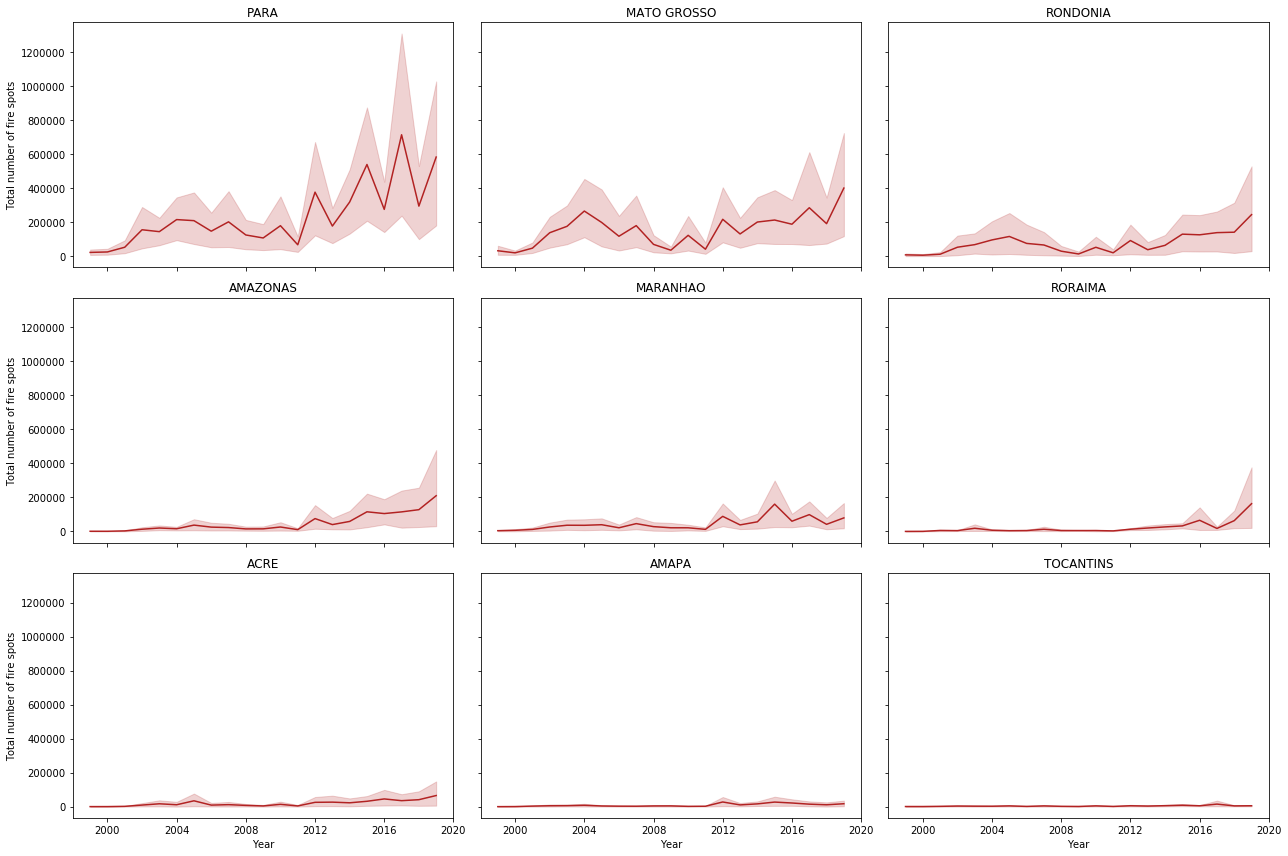

In [19]:
fig, ax = plt.subplots(3, 3, figsize=(18, 12), sharex=True, sharey=True)
ax = ax.flat

i=0
for x in legal_amazon:
    sns.lineplot(data=amazonfires[amazonfires['state'] == x], x='year',
                 y='firespots', estimator='sum', ax=ax[i], color='firebrick')
    ax[i].set_title(x)
    ax[i].set_ylabel("Total number of fire spots")
    ax[i].set_xlabel("Year")
    
    i += 1
    
plt.tight_layout();

### State and month

Now let's take a look in the fire outbreak's behavior throughout a year. The graph below shows the **average** of outbreaks for each state.

The fire outbreaks seem to be concentrated in the second semester of the years for all states, except for Roraima, which is weird. The large confidence intervals are due to the variation among years, previously noticed.

**FRED**: Acho que dá pra deixar só esse gráfico do mesmo formato. O de barras não precisa

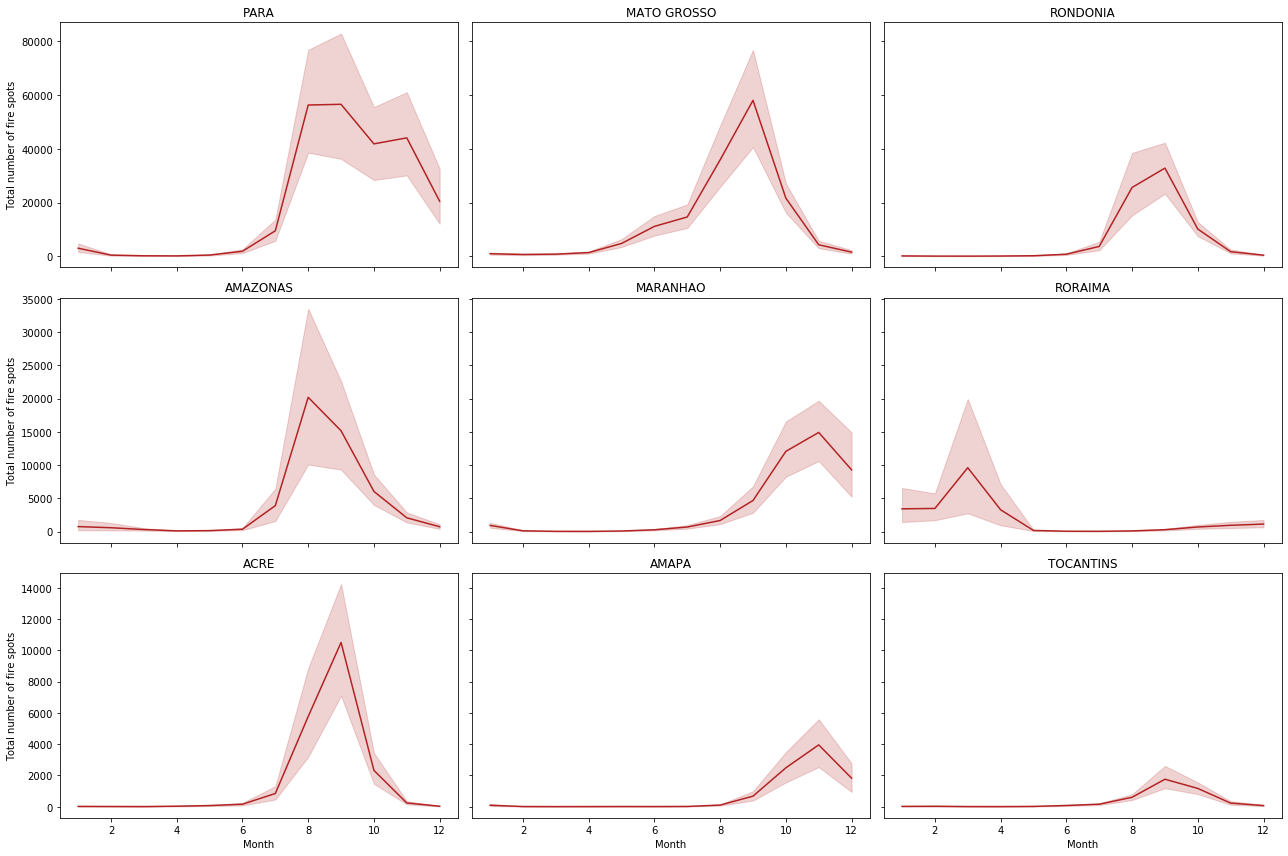

In [64]:
fig, ax = plt.subplots(3, 3, figsize=(18, 12), sharex=True, sharey='row')
ax = ax.flat

i=0
for x in legal_amazon:
    sns.lineplot(data=amazonfires[amazonfires['state'] == x], x='month',
                y='firespots', ax=ax[i], color='firebrick')
    ax[i].set_title(x)
    ax[i].set_ylabel("Total number of fire spots")
    ax[i].set_xlabel("Month")
    
    i += 1
    
plt.tight_layout();

In [9]:
"""fig, ax = plt.subplots(3, 3, figsize=(14, 12), sharex=True, sharey=True)
ax = ax.flat

i=0
for x in legal_amazon:
    sns.barplot(data=amazonfires[amazonfires['state'] == x], x='month',
                y='firespots', label = x, ax=ax[i], color='blue')
    
    ax[i].set_ylabel("Total number of fire spots")
    ax[i].set_xlabel("Month")

    ax[i].legend()
    
    i = i+1
    
plt.tight_layout();"""

'fig, ax = plt.subplots(3, 3, figsize=(14, 12), sharex=True, sharey=True)\nax = ax.flat\n\ni=0\nfor x in legal_amazon:\n    sns.barplot(data=amazonfires[amazonfires[\'state\'] == x], x=\'month\',\n                y=\'firespots\', label = x, ax=ax[i], color=\'blue\')\n    \n    ax[i].set_ylabel("Total number of fire spots")\n    ax[i].set_xlabel("Month")\n\n    ax[i].legend()\n    \n    i = i+1\n    \nplt.tight_layout();'

---

## 2.3 - Year, Month and State

Since the seasons are cyclical, it is interesting to note what is the behavior per month and how it is changing over the years. The graphs below show the amount of fire outbreks over the years, for each month of the year for each state.

The color scale is not shared, so we can better see the individual behavior for each state.

- Although the first semester of the year are those with least fires, it can be seen that in recent years, even those months have been marked by an increase in fire outbreaks.
- 2019 have been one of the worst year in this matter, Having breaken records from February to August in the amount of fire outbreaks, and maintaining the same values in the other months (it is important to note that December 2019 is not complete because data were extracted at December 4th 2019).

## FRED

item 1: Só em roraima isso né? Não vejo essa tendencia no resto.

Acho que dá pra fazer uma análise na diferença dos comportamentos dos estados aqui e coisas que chamam atenção, tipo roraima. Dizer que estados que tem observado o mesmo padrão de queimadas desde o começo provavelmente são por causas naturais.

O fato de que os primeiros anos quase nao tem queimada em nenhum estado parece que eles não coletavam dados lá também.

In [20]:
limits = [180000, 80000, 60000, 40000, 30000, 30000, 16000, 8000, 3000]

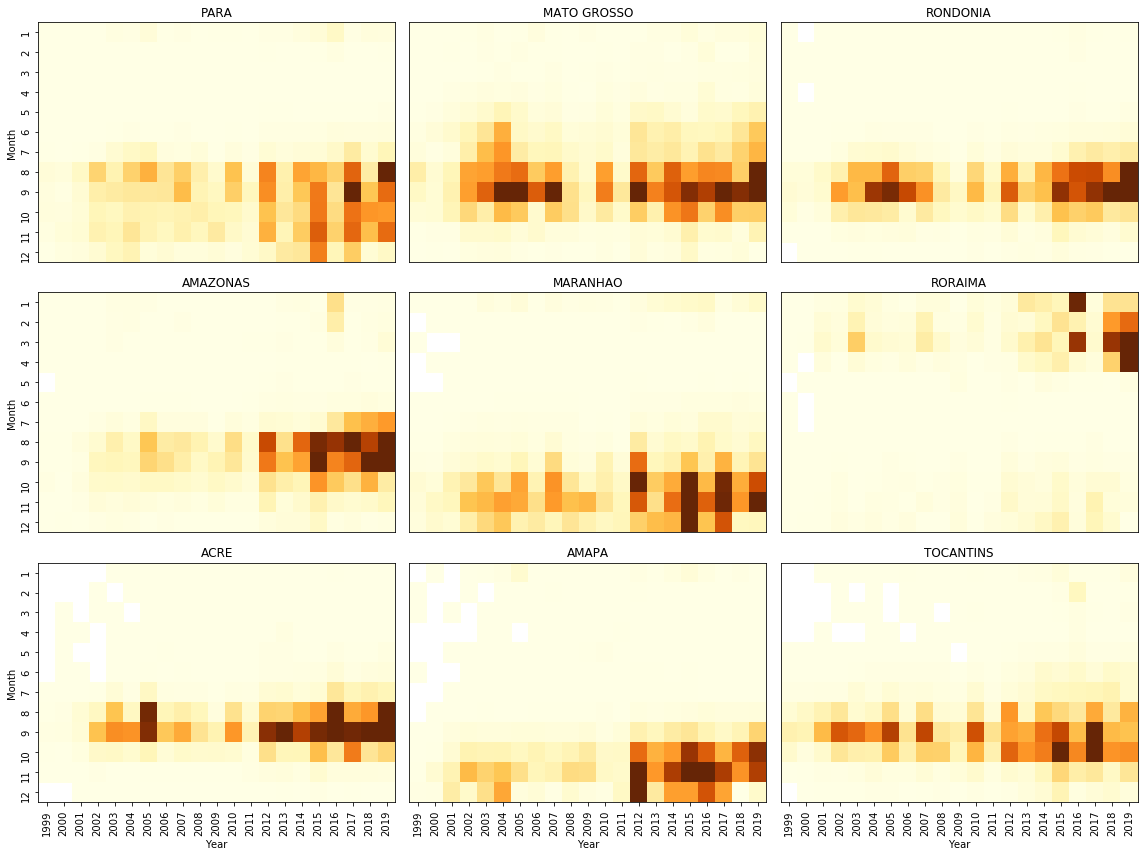

In [21]:
fig, ax = plt.subplots(3, 3, figsize=(16, 12), sharex=True, sharey=True)
ax = ax.flat

i=0
for x in legal_amazon:
    st_month_year_pivot = amazonfires[amazonfires['state'] == x].pivot_table(values='firespots', index='month', columns='year', aggfunc='sum')
    
    sns.heatmap(data=st_month_year_pivot, xticklabels=int_year, ax=ax[i], cmap='YlOrBr', cbar=False, vmax=limits[i])
    
    ax[i].set_ylabel("Month")
    ax[i].set_xlabel("Year")
    ax[i].set_title(x)
    
    for _, spine in ax[i].spines.items():
        spine.set_visible(True)
        
    ax[i].xaxis.set_visible(False)
    ax[i].yaxis.set_visible(False)
    
    i += 1
    

for a in [ax[0], ax[3], ax[6]]:
    a.yaxis.set_visible(True)
    
for a in [ax[6], ax[7], ax[8]]:
    a.xaxis.set_visible(True)
    
    
plt.tight_layout(); #automatically organize the figures

## Fred

Acho que esse não precisa e só o heatmap tá bom

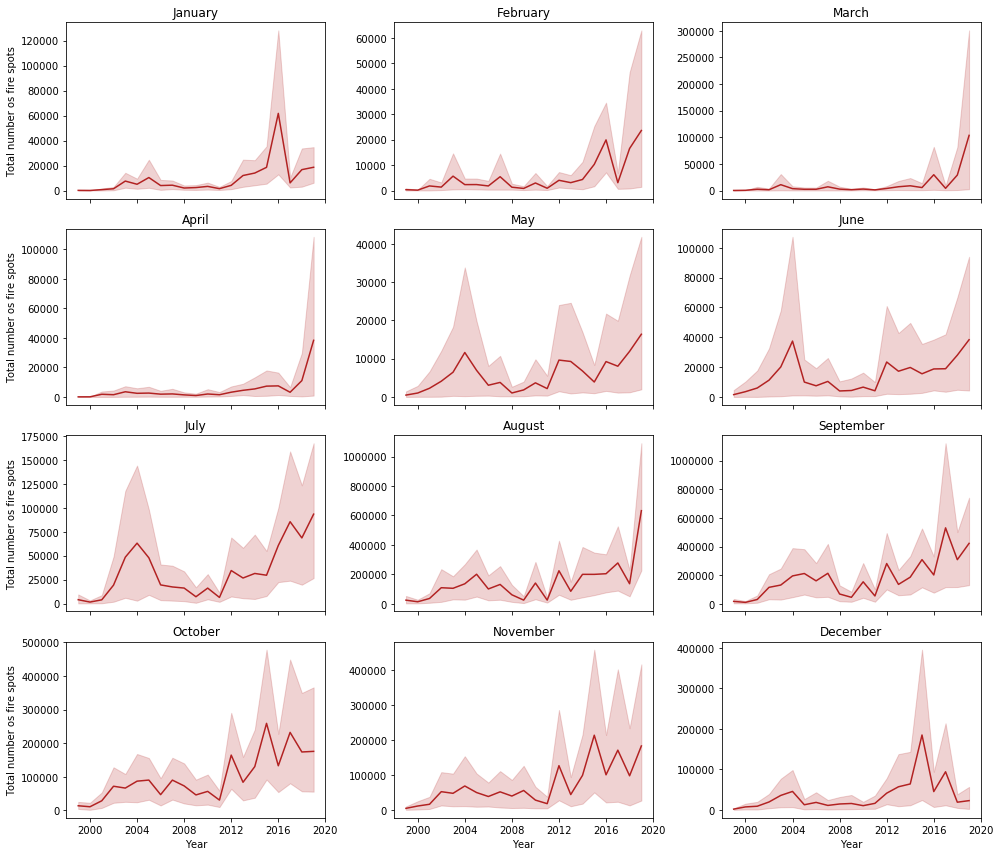

In [93]:
"""fig, ax = plt.subplots(4, 3, figsize = (14,12), sharex=True)
ax = ax.flat

i=0
for x in fullmonth:
    sns.lineplot(data=amazonfires[amazonfires['month'] == i+1], x='year', y='firespots', estimator='sum', color="firebrick", ax=ax[i])
    ax[i].set_title(x)
    ax[i].set_xlabel("Year")
    ax[i].set_ylabel("")
    
    i = i+1
    
for i in [0, 3, 6, 9]:
    ax[i].set_ylabel("Total number os fire spots")
    
plt.tight_layout();""" #automatically organize the figures

## 2.4 - Interactive Map

To have a better view of the location and amount of the fire outbreaks, as well as the variations over the years, I encourage you to play a little bit with the map below. You can pass the years through the slider and observe the color and size of the bubbles in each state.

In [19]:
%%HTML
<div class='tableauPlaceholder' id='viz1576060411821' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;am&#47;amazon-fires-map&#47;AmazonFires&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='amazon-fires-map&#47;AmazonFires' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;am&#47;amazon-fires-map&#47;AmazonFires&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1576060411821');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

# 3. Conclusions



## Fred

Aqui da pra responder as perguntas:
- tá aumentando dos ultimos anos pra cá?
- a tendencia é aumentar nos próximos anos? (talvez os gráficos de tendencia seja mais fácil de fazer no tableau, nunca fiz no python teria que dar uma pesquisada
- É causa natural ou não? Em quais estados?